# ELM with k fold cross validation 

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import numpy as np

In [5]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Data preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

class ELMClassifier:
    def __init__(self, n_hidden):
        self.n_hidden = n_hidden
        self.input_weights = None
        self.output_weights = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Randomly initialize input weights
        self.input_weights = np.random.randn(n_features, self.n_hidden)

        # Compute hidden layer output
        hidden_output = self._sigmoid(X @ self.input_weights)

        # Solve for output weights using pseudoinverse
        self.output_weights = np.linalg.pinv(hidden_output) @ y

    def predict(self, X):
        hidden_output = self._sigmoid(X @ self.input_weights)
        predicted_output = hidden_output @ self.output_weights
        return np.argmax(predicted_output, axis=1)

def k_fold_cross_validation(X_train, y_train, n_folds=5, model_class=ELMClassifier, **model_params):
    
    # Initialize an array to store accuracy scores
    accuracy_scores = []

    # Split the data into k folds
    fold_size = len(X_train) // n_folds
    for i in range(n_folds):
        #indices for the current fold
        start_idx = i * fold_size
        end_idx = (i + 1) * fold_size if i < n_folds - 1 else len(X_train)
        test_indices = np.array(range(start_idx, end_idx)).astype(int)
        train_indices = np.array(list(np.concatenate((range(0, start_idx), range(end_idx, len(X_train)))))).astype(int)

        # Split the data into train and test sets
        X_fold_train, X_fold_test = X_train[train_indices], X_train[test_indices]
        y_fold_train, y_fold_test = y_train[train_indices], y_train[test_indices]

        # Create and train the model
        model = model_class(**model_params)
        model.fit(X_fold_train, y_fold_train)

        # Make predictions on the test set
        y_pred = model.predict(X_fold_test)

        # Evaluate the model
        accuracy = np.mean(y_pred == np.argmax(y_fold_test, axis=1))
        accuracy_scores.append(accuracy)

    # Compute the average accuracy across all folds
    average_accuracy = np.mean(accuracy_scores)
    return average_accuracy

# Load Iris dataset
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X, y = iris.data, iris.target

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target labels to one-hot encoded format
y_one_hot = np.eye(np.unique(y).shape[0])[y]

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=seed)

# Define model parameters
model_params = {}

# Perform K-Fold Cross-Validation for different numbers of hidden nodes
n_splits = 5
hidden_nodes = [10, 20, 30, 35, 40, 45, 50, 100, 150, 200, 250, 300, 500, 800, 1000]
best_accuracy = -1
best_num_nodes = None
for n_hidden in hidden_nodes:
    average_accuracy = k_fold_cross_validation(X_train, y_train, n_splits, ELMClassifier, n_hidden=n_hidden)
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_num_nodes = n_hidden
    print(f"Average Accuracy for {n_hidden} hidden nodes: {average_accuracy:.2f}")

print(f"Best number of hidden nodes: {best_num_nodes} with accuracy: {best_accuracy:.2f}")

# Train the model with the best number of hidden nodes on the remaining 20% of the data
best_model = ELMClassifier(n_hidden=best_num_nodes)
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
accuracy_test = np.mean(y_pred_test == np.argmax(y_test, axis=1))
print(f"Accuracy on test set with best model: {accuracy_test:.2f}")


Average Accuracy for 10 hidden nodes: 0.78
Average Accuracy for 20 hidden nodes: 0.87
Average Accuracy for 30 hidden nodes: 0.89
Average Accuracy for 35 hidden nodes: 0.88
Average Accuracy for 40 hidden nodes: 0.91
Average Accuracy for 45 hidden nodes: 0.91
Average Accuracy for 50 hidden nodes: 0.88
Average Accuracy for 100 hidden nodes: 0.66
Average Accuracy for 150 hidden nodes: 0.81
Average Accuracy for 200 hidden nodes: 0.82
Average Accuracy for 250 hidden nodes: 0.88
Average Accuracy for 300 hidden nodes: 0.82
Average Accuracy for 500 hidden nodes: 0.86
Average Accuracy for 800 hidden nodes: 0.85
Average Accuracy for 1000 hidden nodes: 0.88
Best number of hidden nodes: 40 with accuracy: 0.91
Accuracy on test set with best model: 0.97


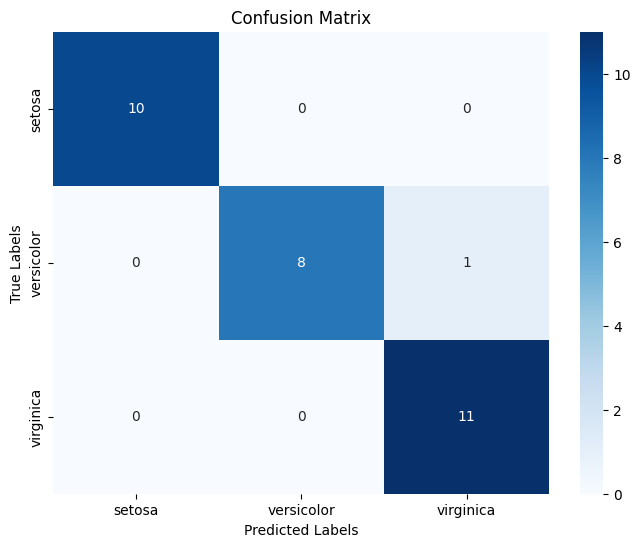

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute predictions on the test set
y_pred_test = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# RVFL

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

class RVFLClassifier:
    def __init__(self, n_hidden):
        self.n_hidden = n_hidden
        self.input_weights = None
        self.bias = None
        self.random_hidden_weights = None
        self.output_weights = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Randomly initialize input weights and bias
        self.input_weights = np.random.randn(n_features, self.n_hidden)
        self.bias = np.random.randn(1, self.n_hidden)

        # Generate random hidden layer parameters
        self.random_hidden_weights = np.random.randn(n_features, self.n_hidden)

        # Compute hidden layer output
        hidden_output = self._sigmoid(X @ self.random_hidden_weights + self.bias)

        # Solve for output weights using pseudoinverse
        self.output_weights = np.linalg.pinv(hidden_output) @ y

    def predict(self, X):
        hidden_output = self._sigmoid(X @ self.random_hidden_weights + self.bias)
        predicted_output = hidden_output @ self.output_weights
        return np.argmax(predicted_output, axis=1)

def k_fold_cross_validation(X_train, y_train, n_folds=5, model_class=RVFLClassifier, **model_params):
    # Initialize an array to store accuracy scores
    accuracy_scores = []

    # Split the data into k folds
    fold_size = len(X_train) // n_folds
    for i in range(n_folds):
        # Indices for the current fold
        start_idx = i * fold_size
        end_idx = (i + 1) * fold_size if i < n_folds - 1 else len(X_train)
        test_indices = np.array(range(start_idx, end_idx)).astype(int)
        train_indices = np.array(list(np.concatenate((range(0, start_idx), range(end_idx, len(X_train)))))).astype(int)

        # Split the data into train and test sets
        X_fold_train, X_fold_test = X_train[train_indices], X_train[test_indices]
        y_fold_train, y_fold_test = y_train[train_indices], y_train[test_indices]

        # Create and train the model
        model = model_class(**model_params)
        model.fit(X_fold_train, y_fold_train)

        # Make predictions on the test set
        y_pred = model.predict(X_fold_test)

        # Evaluate the model
        accuracy = np.mean(y_pred == np.argmax(y_fold_test, axis=1))
        accuracy_scores.append(accuracy)

    # Compute the average accuracy across all folds
    average_accuracy = np.mean(accuracy_scores)
    return average_accuracy

# Load Iris dataset
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X, y = iris.data, iris.target

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target labels to one-hot encoded format
y_one_hot = np.eye(np.unique(y).shape[0])[y]

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=seed)

# Define model parameters
model_params = {}

# Perform K-Fold Cross-Validation for different numbers of hidden nodes
n_splits = 5
hidden_nodes = [10, 20, 30, 35, 40, 45, 50, 100, 150, 200, 250, 300, 500, 800, 1000]
best_accuracy = -1
best_num_nodes = None
for n_hidden in hidden_nodes:
    average_accuracy = k_fold_cross_validation(X_train, y_train, n_splits, RVFLClassifier, n_hidden=n_hidden)
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_num_nodes = n_hidden
    print(f"Average Accuracy for {n_hidden} hidden nodes: {average_accuracy:.2f}")

print(f"Best number of hidden nodes: {best_num_nodes} with accuracy: {best_accuracy:.2f}")

# Train the model with the best number of hidden nodes on the remaining 20% of the data
best_model = RVFLClassifier(n_hidden=best_num_nodes)
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
accuracy_test = np.mean(y_pred_test == np.argmax(y_test, axis=1))
print(f"Accuracy on test set with best model: {accuracy_test:.2f}")


Average Accuracy for 10 hidden nodes: 0.93
Average Accuracy for 20 hidden nodes: 0.95
Average Accuracy for 30 hidden nodes: 0.93
Average Accuracy for 35 hidden nodes: 0.93
Average Accuracy for 40 hidden nodes: 0.92
Average Accuracy for 45 hidden nodes: 0.93
Average Accuracy for 50 hidden nodes: 0.92
Average Accuracy for 100 hidden nodes: 0.71
Average Accuracy for 150 hidden nodes: 0.81
Average Accuracy for 200 hidden nodes: 0.87
Average Accuracy for 250 hidden nodes: 0.83
Average Accuracy for 300 hidden nodes: 0.82
Average Accuracy for 500 hidden nodes: 0.87
Average Accuracy for 800 hidden nodes: 0.88
Average Accuracy for 1000 hidden nodes: 0.89
Best number of hidden nodes: 20 with accuracy: 0.95
Accuracy on test set with best model: 1.00


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

class RVFLClassifier:
    def __init__(self, n_hidden, regularization_param):
        self.n_hidden = n_hidden
        self.regularization_param = regularization_param
        self.input_weights = None
        self.bias = None
        self.random_hidden_weights = None
        self.output_weights = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Randomly initialize input weights and bias
        self.input_weights = np.random.randn(n_features, self.n_hidden)
        self.bias = np.random.randn(1, self.n_hidden)

        # Generate random hidden layer parameters
        self.random_hidden_weights = np.random.randn(n_features, self.n_hidden)

        # Compute hidden layer output
        hidden_output = self._sigmoid(X @ self.random_hidden_weights + self.bias)

        # Add a bias term to hidden layer output
        H = np.hstack((hidden_output, np.ones((n_samples, 1))))

        # Compute output weights using regularized least squares
        self.output_weights = np.linalg.inv(H.T @ H + self.regularization_param * np.eye(H.shape[1])) @ H.T @ y

    def predict(self, X):
        hidden_output = self._sigmoid(X @ self.random_hidden_weights + self.bias)
        H = np.hstack((hidden_output, np.ones((X.shape[0], 1))))
        predicted_output = H @ self.output_weights
        return np.argmax(predicted_output, axis=1)

def k_fold_cross_validation(X_train, y_train, n_folds=5, model_class=RVFLClassifier, **model_params):
    # Initialize an array to store accuracy scores
    accuracy_scores = []

    # Split the data into k folds
    fold_size = len(X_train) // n_folds
    for i in range(n_folds):
        # Indices for the current fold
        start_idx = i * fold_size
        end_idx = (i + 1) * fold_size if i < n_folds - 1 else len(X_train)
        test_indices = np.array(range(start_idx, end_idx)).astype(int)
        train_indices = np.array(list(np.concatenate((range(0, start_idx), range(end_idx, len(X_train)))))).astype(int)

        # Split the data into train and test sets
        X_fold_train, X_fold_test = X_train[train_indices], X_train[test_indices]
        y_fold_train, y_fold_test = y_train[train_indices], y_train[test_indices]

        # Create and train the model
        model = model_class(**model_params)
        model.fit(X_fold_train, y_fold_train)

        # Make predictions on the test set
        y_pred = model.predict(X_fold_test)

        # Evaluate the model
        accuracy = np.mean(y_pred == np.argmax(y_fold_test, axis=1))
        accuracy_scores.append(accuracy)

    # Compute the average accuracy across all folds
    average_accuracy = np.mean(accuracy_scores)
    return average_accuracy

# Load Iris dataset
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X, y = iris.data, iris.target

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target labels to one-hot encoded format
y_one_hot = np.eye(np.unique(y).shape[0])[y]

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=seed)

# Define model parameters
model_params = {'regularization_param': 0.1}

# Perform K-Fold Cross-Validation for different numbers of hidden nodes
n_splits = 5
hidden_nodes = [10, 20, 30, 35, 40, 45, 50, 100, 150, 200, 250, 300, 500, 800, 1000]
best_accuracy = -1
best_num_nodes = None
for n_hidden in hidden_nodes:
    average_accuracy = k_fold_cross_validation(X_train, y_train, n_splits, RVFLClassifier, n_hidden=n_hidden, **model_params)
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_num_nodes = n_hidden
    print(f"Average Accuracy for {n_hidden} hidden nodes: {average_accuracy:.2f}")

print(f"Best number of hidden nodes: {best_num_nodes} with accuracy: {best_accuracy:.2f}")

# Train the model with the best number of hidden nodes on the remaining 20% of the data
best_model = RVFLClassifier(n_hidden=best_num_nodes, **model_params)
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
accuracy_test = np.mean(y_pred_test == np.argmax(y_test, axis=1))
print(f"Accuracy on test set with best model: {accuracy_test:.2f}")


Average Accuracy for 10 hidden nodes: 0.92
Average Accuracy for 20 hidden nodes: 0.93
Average Accuracy for 30 hidden nodes: 0.94
Average Accuracy for 35 hidden nodes: 0.93
Average Accuracy for 40 hidden nodes: 0.96
Average Accuracy for 45 hidden nodes: 0.94
Average Accuracy for 50 hidden nodes: 0.95
Average Accuracy for 100 hidden nodes: 0.93
Average Accuracy for 150 hidden nodes: 0.94
Average Accuracy for 200 hidden nodes: 0.93
Average Accuracy for 250 hidden nodes: 0.93
Average Accuracy for 300 hidden nodes: 0.94
Average Accuracy for 500 hidden nodes: 0.94
Average Accuracy for 800 hidden nodes: 0.93
Average Accuracy for 1000 hidden nodes: 0.93
Best number of hidden nodes: 40 with accuracy: 0.96
Accuracy on test set with best model: 1.00
